# Visualise data using Parallel Coordinates

The [Olympics 2021](https://www.kaggle.com/arjunprasadsarkhel/2021-olympics-in-tokyo) dataset is used to illustrate the use of Parallel Coordinates


NOTE: 
- To make the plotly plots interactive, replace fig.show("png") with fig.show().  
- fig.show() does not render the plots in github. 

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

In [45]:
def annotate(ax, title='', strformat='', divideby=1):
    # Annotate
    for p in ax.patches:
        # format(, '.1f')
        value = p.get_height()/divideby
        ax.annotate(f"{value:.1f}{strformat}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
    ax.set_title(title)

## Read and process the dataset

In [46]:
df_teams = pd.read_excel("data/Teams.xlsx")
df_atheletes = pd.read_excel("data/Athletes.xlsx")
df_medals = pd.read_excel("data/Medals.xlsx")
df_entries = pd.read_excel("data/EntriesGender.xlsx")
print(df_teams.info())
print(df_atheletes.info())
print(df_medals.info())
print(df_entries.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        743 non-null    object
 1   Discipline  743 non-null    object
 2   NOC         743 non-null    object
 3   Event       743 non-null    object
dtypes: object(4)
memory usage: 23.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11085 entries, 0 to 11084
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        11085 non-null  object
 1   NOC         11085 non-null  object
 2   Discipline  11085 non-null  object
dtypes: object(3)
memory usage: 259.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           93 non-null     int64  
 1   Team/NOC       9

- There is no missing data and no missing data handling is needed

In [47]:
df_medals.rename(columns={'Team/NOC':'NOC', 'Total': 'Total Medals', 'Gold':'Gold Medals', 'Silver': 'Silver Medals', 'Bronze': 'Bronze Medals'}, inplace=True)

Let's find the number of disciplines each country has participated in and the number of athletes from each country who participated and merge this data into a single dataframe.

In [48]:
df_disciplines_per_country = df_teams.groupby(by='NOC').agg({'Discipline':'nunique'})
df_disciplines_per_country

,Discipline
NOC,
Angola,1
Argentina,7
Australia,15
Austria,4
Azerbaijan,1
...,...
United States of America,18
Uzbekistan,1
Venezuela,1


In [49]:
df_atheletes_per_country = df_atheletes.groupby(by='NOC').agg({'Name':'nunique'}).rename(columns={'Name':'Athletes'})
df_atheletes_per_country

,Athletes
NOC,
Afghanistan,5
Albania,8
Algeria,41
American Samoa,5
Andorra,2
...,...
"Virgin Islands, British",3
"Virgin Islands, US",4
Yemen,3


In [50]:
df = pd.merge(left=df_disciplines_per_country, right=df_medals, how='inner',on='NOC')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 73
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NOC            74 non-null     object 
 1   Discipline     74 non-null     int64  
 2   Rank           74 non-null     int64  
 3   Gold Medals    74 non-null     int64  
 4   Silver Medals  74 non-null     int64  
 5   Bronze Medals  74 non-null     int64  
 6   Total Medals   74 non-null     int64  
 7   Rank by Total  74 non-null     int64  
 8   Unnamed: 7     0 non-null      float64
 9   Unnamed: 8     1 non-null      float64
dtypes: float64(2), int64(7), object(1)
memory usage: 6.4+ KB


In [51]:
df = pd.merge(left=df, right=df_atheletes_per_country, how='inner',on='NOC')
df.rename(columns={'NOC':'Country'}, inplace=True)
df = df[['Country', 'Rank', 'Total Medals', 'Gold Medals', 'Silver Medals', 'Bronze Medals', 'Athletes', 'Discipline' ]]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 73
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country        74 non-null     object
 1   Rank           74 non-null     int64 
 2   Total Medals   74 non-null     int64 
 3   Gold Medals    74 non-null     int64 
 4   Silver Medals  74 non-null     int64 
 5   Bronze Medals  74 non-null     int64 
 6   Athletes       74 non-null     int64 
 7   Discipline     74 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 5.2+ KB


In [52]:
df.sort_values(by='Rank', inplace=True)
df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)
df.head(10)

,Country,Rank,Total Medals,Gold Medals,Silver Medals,Bronze Medals,Athletes,Discipline
0,United States of America,1,113,39,41,33,614,18
1,People's Republic of China,2,88,38,32,18,398,17
2,Japan,3,58,27,14,17,585,20
3,Great Britain,4,65,22,21,22,366,10
4,ROC,5,71,20,28,23,318,14
5,Australia,6,46,17,7,22,470,15
6,Netherlands,7,36,10,12,14,272,13
7,France,8,33,10,12,11,377,15
8,Germany,9,37,10,11,16,399,13
9,Italy,10,40,10,10,20,354,15


<AxesSubplot:>

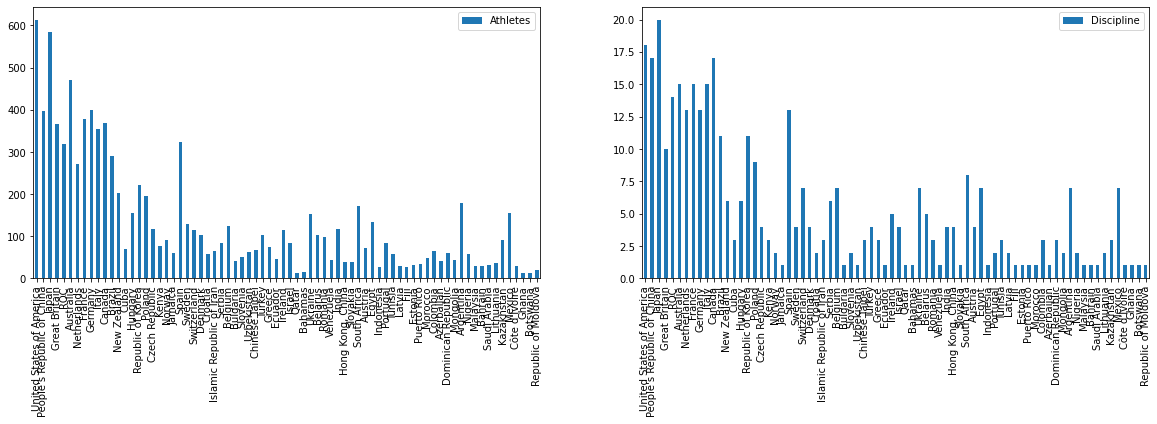

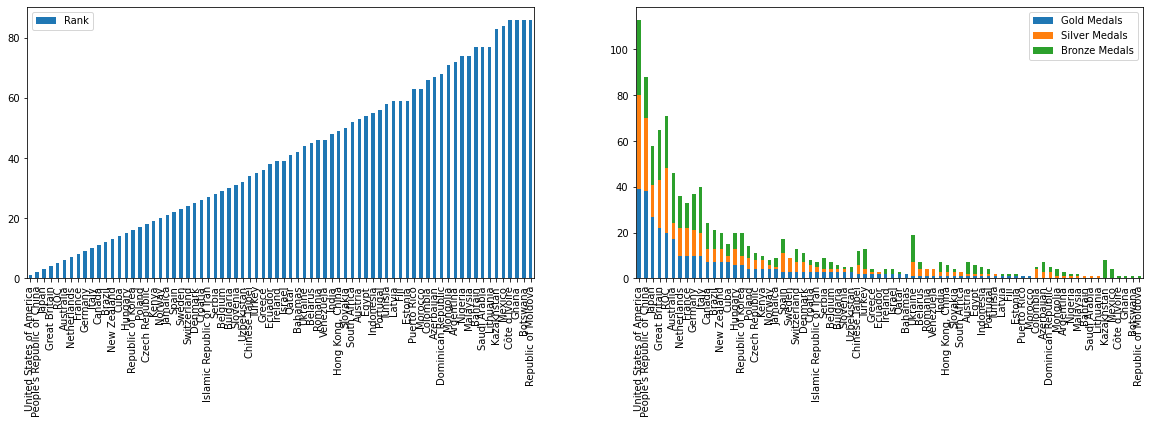

In [53]:
plt.figure(figsize=(20, 5))

ax = plt.subplot(1,2,1)
ax = df[['Country','Athletes']].plot.bar(x='Country', xlabel = '', ax=ax)

ax = plt.subplot(1,2,2)
df[['Country','Discipline']].plot.bar(x='Country', xlabel = '', ax=ax)

plt.figure(figsize=(20, 5))
ax = plt.subplot(1,2,1)
df[['Country','Rank']].plot.bar(x='Country', xlabel = '', ax=ax)

ax = plt.subplot(1,2,2)
df[['Country','Gold Medals', 'Silver Medals','Bronze Medals',]].plot.bar(stacked=True, x='Country', xlabel = '', ax=ax)

## Plot Parallel Coordinates using pandas
Let's plot using pandas interface for 20 countries

<AxesSubplot:>

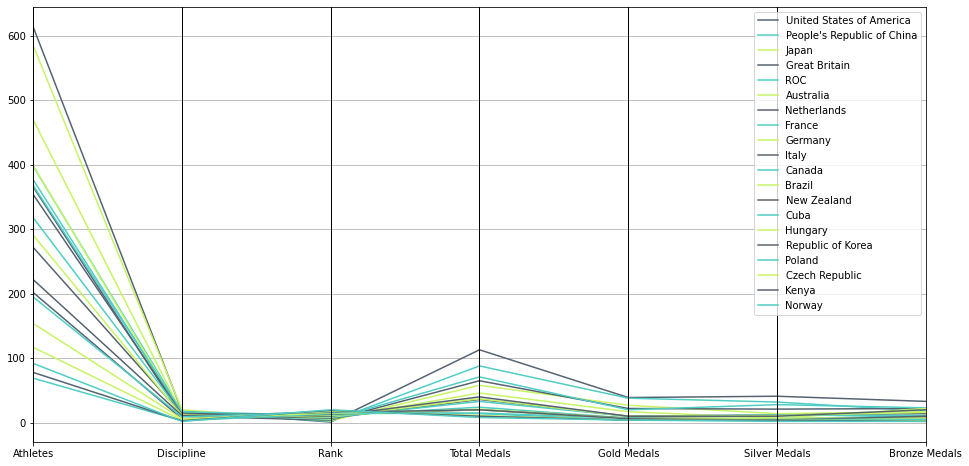

In [54]:
df_20 = df.head(20).copy()
df_20 = df_20[['Country', 'Athletes', 'Discipline', 'Rank', 'Total Medals', 'Gold Medals', 'Silver Medals', 'Bronze Medals']]
plt.figure(figsize=(16,8))
pd.plotting.parallel_coordinates(df_20, 'Country', color=('#556270', '#4ECDC4', '#C7F464'))

With the pandas interface we have 2 issues
1. We cannot control the scale of individual axes
2. We cannot label the (poly-)lines inline

We could use plotly for better control on the various parameters.

## Parallel Coordinates plot using plotly

Before we dive deep, a little about plotly. Plotly is a Python graphing library that makes interactive, publication-quality graphs online. It provides 2 interfaces
- Plotly Express, an easy-to-use, high-level interface, which produces easy-to-style figures. It uses graph objects internally.
- Plotly Graph Objects, a more detailed interface that could be used for better control. 
Any figure created in a single function call with Plotly Express could also be created using graph objects, but with around 5 to 100 times more code.

To create and render graphical figures (i.e. charts, plots, maps and diagrams) in plotly, one would have to
- *create* figures that can be represented either as dicts or as instances of the plotly.graph_objects
- *manipulate* if required
- *render* that uses the Plotly.js JavaScript library under the hood

Parallel coordinates are richly interactive by default. Drag the lines along the axes to filter regions and drag the axis names across the plot to rearrange variables. 

pip install plotly.

## Use plotly express interface 
In a parallel coordinates plot with [px.parallel_coordinates](https://plotly.com/python-api-reference/generated/plotly.express.parallel_coordinates), each row (or sample) of the DataFrame is represented by a polyline mark which traverses a set of parallel axes, one for each of the dimensions. 

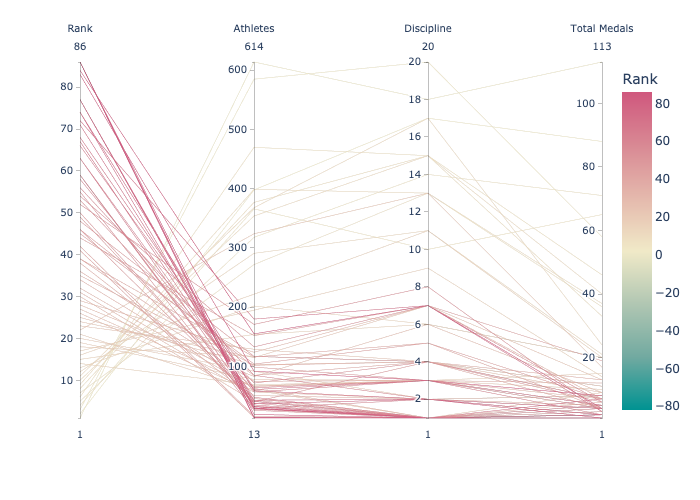

In [55]:
import plotly.express as px
df_ = df.copy()

# color     : Values from this column are used to assign color to the poly lines.
# dimensions: Values from these columns form the axes in the plot.
fig = px.parallel_coordinates(df_, color="Rank", dimensions=['Rank', 'Athletes', 'Discipline','Total Medals'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show("png") #fig.show()

With the plotly.express interface as well, we have the same 2 issues as that of the pandas plotting interface
1. We cannot control the scale of individual axes
2. We cannot label the (poly-)lines inline

Only this one supports intercativity

## Use plotly's graph_objects
[plotly.graph_objects.Parcoords](https://plotly.com/python/reference/parcoords/) allows control to a granular level - range of each axis, tick values, label of the axis etc.
1. First define the list of dimensions/variables/axes that should be plotted. For each dimension, specify the 
    - range    : start and end values specified as a list or tuple
    - tickvals : values where the ticks should appear on this axis
    - ticktext : text that should appear at the ticks
    - label    : name of the dimension/axis
    - values   : values that should be plotted on that axis
2. Then, create a Parcoords which a list of attributes for the figure. 
3. Next, create a figure with the above defined Parcoords
4. Lastly, render the figure using show

In [56]:
# Note: If you run into rendering issues in visual studio code, uncomment the following lines
#import plotly.io as pio
#pio.renderers.default = "vscode"

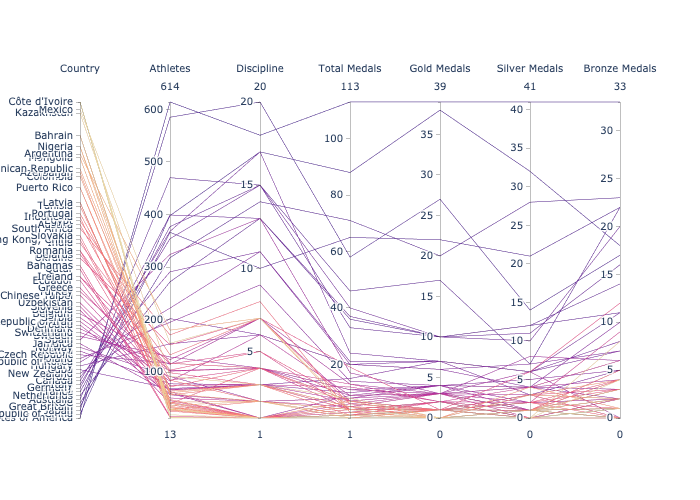

In [57]:
import plotly.graph_objects as go
df_ = df.copy()
dimensions = list([ dict(range=(df_['Rank'].min(), df_['Rank'].max()),tickvals = df_['Rank'], ticktext = df_['Country'],label='Country', values=df_['Rank']),
                    dict(range=(df_['Athletes'].min(),df_['Athletes'].max()),label='Athletes', values=df_['Athletes']),
                    dict(range=(df_['Discipline'].min(),df_['Discipline'].max()),label='Discipline', values=df_['Discipline']),
                    dict(range=(df_['Total Medals'].min(), df_['Total Medals'].max()),label='Total Medals', values=df_['Total Medals']),
                    dict(range=(df_['Gold Medals'].min(), df_['Gold Medals'].max()),label='Gold Medals', values=df_['Gold Medals']),
                    dict(range=(df_['Silver Medals'].min(), df_['Silver Medals'].max()),label='Silver Medals', values=df_['Silver Medals']),
                    dict(range=(df_['Bronze Medals'].min(), df_['Bronze Medals'].max()),label='Bronze Medals', values=df_['Bronze Medals']),
                  ])
fig = go.Figure(data= go.Parcoords(line = dict(color = df_['Rank'], colorscale = 'agsunset'), dimensions = dimensions))
fig.show("png") #fig.show()

# Note for the Rank axis, the ticks are displayed using the Rank column but the labels are using hte Country column
# For various possible values that can be passed to colorscale, check https://plotly.com/python/builtin-colorscales/

A better plot than what pandas gave us. But the figure size is bad - labels are cut off

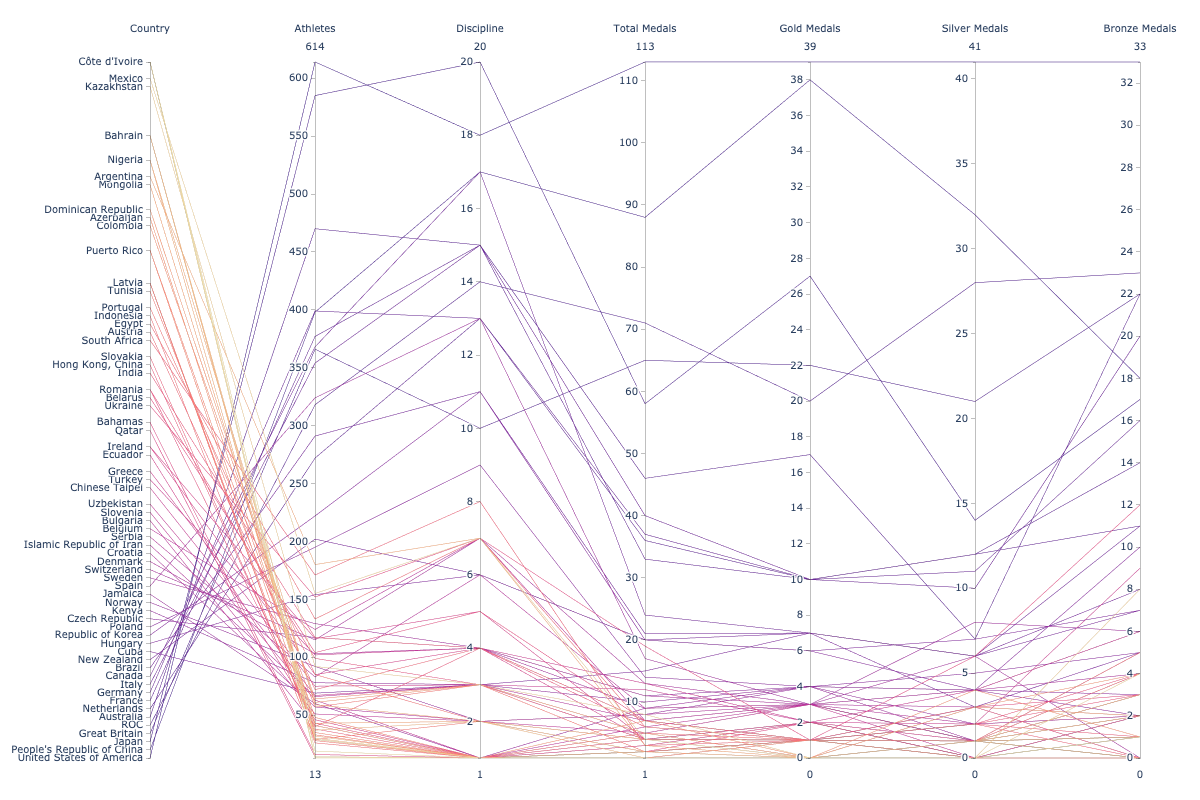

In [58]:
# Adjust the size to fit all the labels
fig.update_layout(width=1200, height=800,margin=dict(l=150, r=60, t=60, b=40))
fig.show("png") #fig.show()

There is still one issue. USA won the most medals but is displayed at the bottom. Due to this there are unnecessary criss-crossed lines. This is no very intuitive. We would like to see countries in descending order

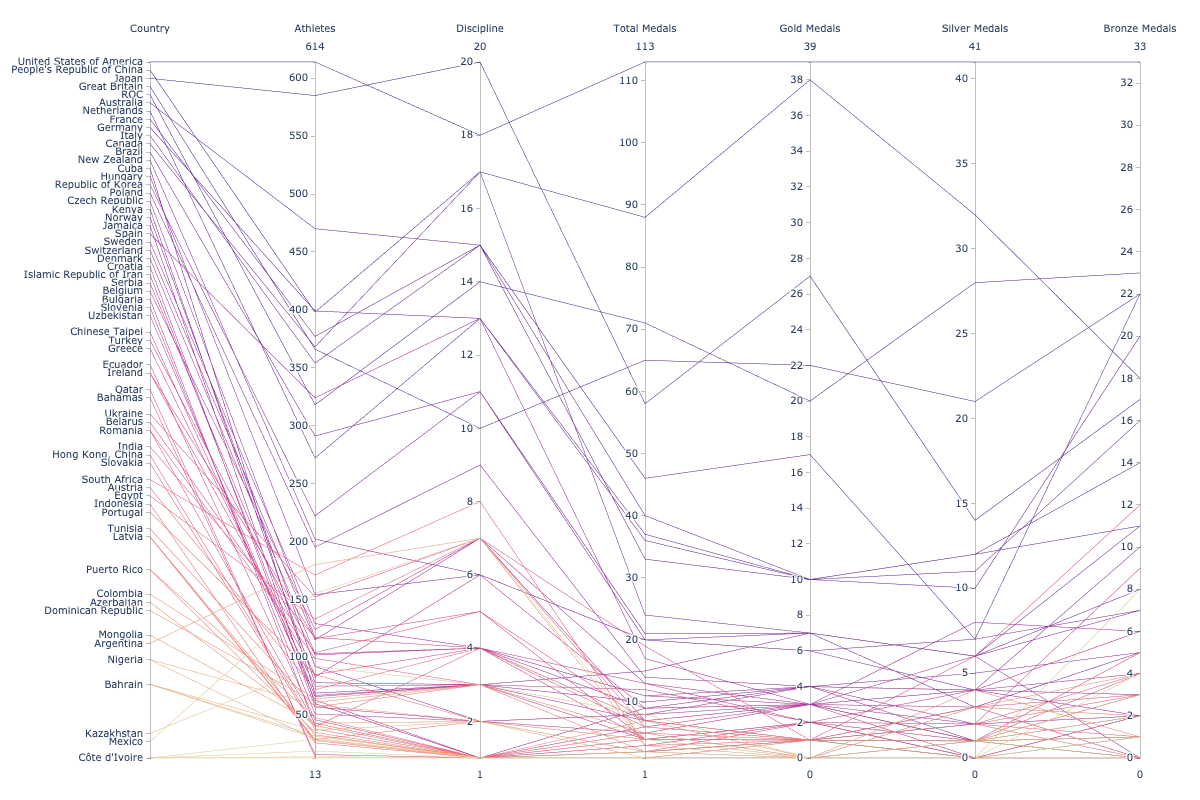

In [59]:
# Let's reverse the min and max values for the Rank, so that the country with top rank comes on the top. 
dimensions = list([ dict(range=(df_['Rank'].max(), df_['Rank'].min()), tickvals = df_['Rank'], ticktext = df_['Country'],label='Country', values=df_['Rank']),
                    dict(range=(df_['Athletes'].min(),df_['Athletes'].max()),label='Athletes', values=df_['Athletes']),
                    dict(range=(df_['Discipline'].min(),df_['Discipline'].max()),label='Discipline', values=df_['Discipline']),
                    dict(range=(df_['Total Medals'].min(), df_['Total Medals'].max()),label='Total Medals', values=df_['Total Medals']),
                    dict(range=(df_['Gold Medals'].min(), df_['Gold Medals'].max()), label='Gold Medals', values=df_['Gold Medals']),
                    dict(range=(df_['Silver Medals'].min(), df_['Silver Medals'].max()),label='Silver Medals', values=df_['Silver Medals']),
                    dict(range=(df_['Bronze Medals'].min(), df_['Bronze Medals'].max()),label='Bronze Medals', values=df_['Bronze Medals']),
                  ])
fig = go.Figure(data= go.Parcoords(line = dict(color = df_['Rank'], colorscale = 'agsunset'), dimensions = dimensions))
fig.update_layout(width=1200, height=800,margin=dict(l=150, r=60, t=60, b=40))
fig.show("png") #fig.show()

Now the plot looks much better
- The Top 5 countries have 400+ athletes participated in 15+ disciplines won 50+ Medals out of which 20+ are Gold medals
- While most countries have < 200 athletes participated in <7 disciplines won <20 Medals out of which <5 are Gold medals
- Japan though fielded 570+ athletes in 20 (most disciplines than all the countries) is at 3rd position with 60 total medals and 27 Golds
- While China fielded 400 athletes in 15 disciplines is at 2nd position with 88 medals and 37 Golds

### Interactivity
The plots support interactivity
- Drag the lines along the axes to filter regions
- Drag the axis names across the plot to rearrange variables. 

### Disciplines - entries - male - female

In [60]:
# Let's create a discipline code to uniquely identify each Discipline
df_entries.sort_values(by='Total', ascending=False, inplace=True)
df_entries.reset_index(inplace=True)
df_entries['Discipline Code'] = df_entries.index + 1
print(df_entries.head())

   index Discipline  Female  Male  Total  Discipline Code
0      4  Athletics     969  1072   2041                1
1     36   Swimming     361   418    779                2
2     20   Football     264   344    608                3
3     29     Rowing     257   265    522                4
4     24       Judo     192   201    393                5


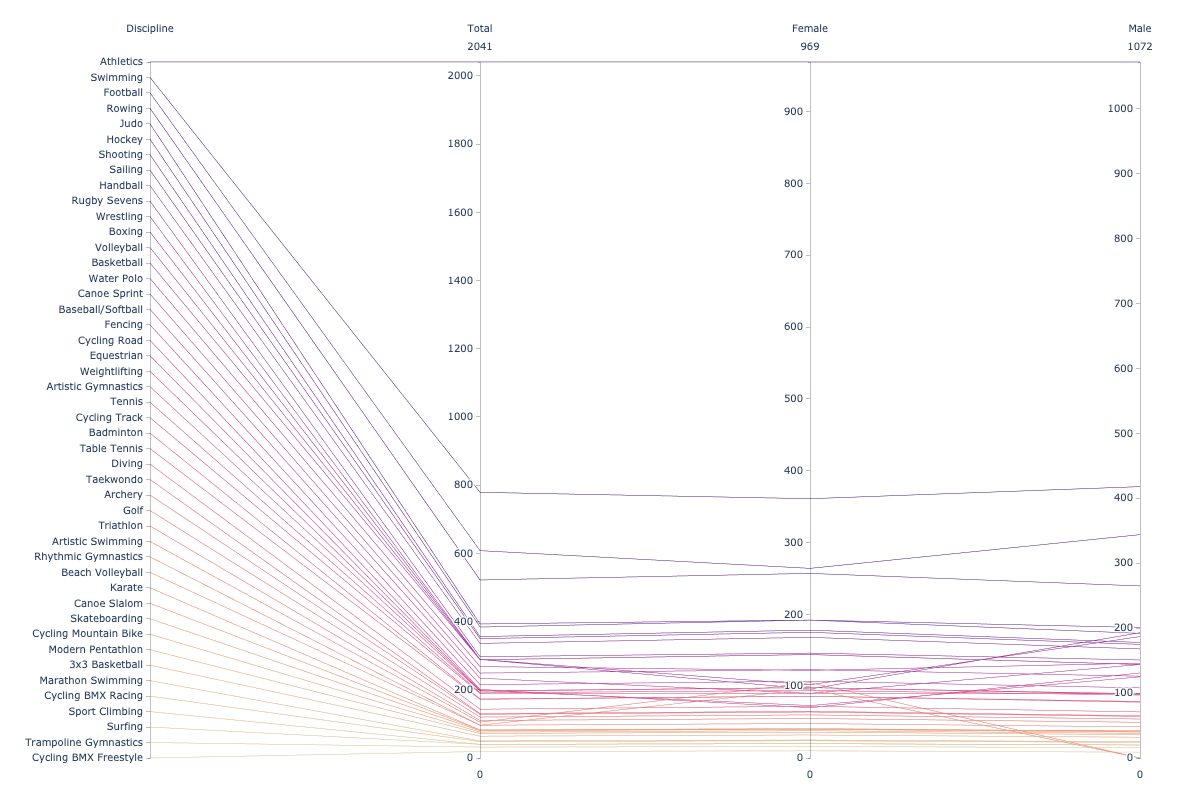

In [61]:
df_ = df_entries.copy()
dimensions = list([ dict(range=(df_['Discipline Code'].max(), 1),label='Discipline', values=df_['Discipline Code'],
                       tickvals = df_['Discipline Code'], ticktext = df_['Discipline']),
                    dict(range=(0,df_['Total'].max()), label='Total', values=df_['Total']),
                    dict(range=(0,df_['Female'].max()), label='Female', values=df_['Female']),
                    dict(range=(0,df_['Male'].max()), label='Male', values=df_['Male']),
                  ])
fig = go.Figure(data= go.Parcoords(line = dict(color = df_['Discipline Code'], colorscale = 'agsunset'),dimensions = dimensions))
fig.update_layout(width=1200, height=800,margin=dict(l=150, r=60, t=60, b=40))
fig.show("png") #fig.show()

In this case, the line that goes from Total to Female and Male is a straight line gives an impression that the values are same. This happens because we are using the min and max values as range for Female and Male axes. This is not very intuitive. Instead we could use a common range for Total, Female and Male axes

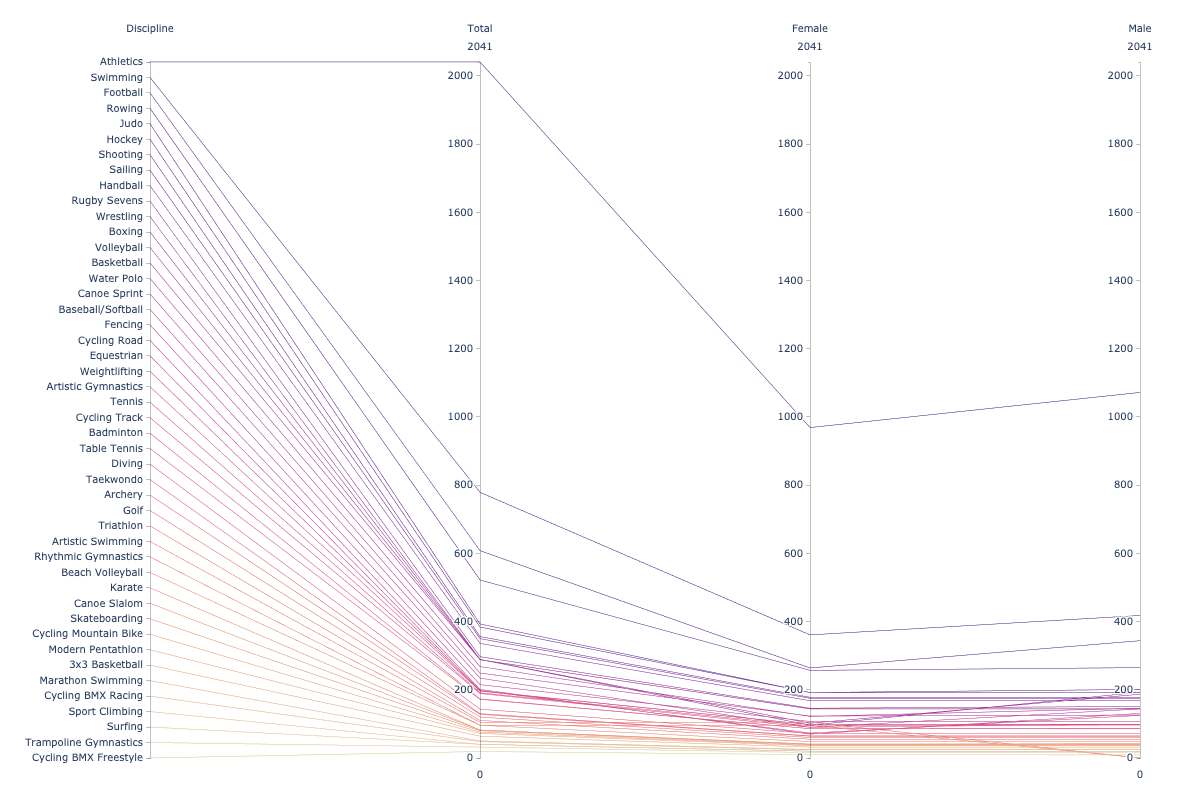

In [62]:
dimensions = list([ 
                    dict(range=(df_['Discipline Code'].max(), 1),
                       tickvals = df_['Discipline Code'], ticktext = df_['Discipline'],
                       label='Discipline', values=df_['Discipline Code']),
                    dict(range=(0,df_['Total'].max()), label='Total', values=df_['Total']),
                    dict(range=(0,df_['Total'].max()), label='Female', values=df_['Female']),
                    dict(range=(0,df_['Total'].max()), label='Male', values=df_['Male']),
                  ])
fig = go.Figure(data= go.Parcoords(line = dict(color = df_['Discipline Code'], colorscale = 'agsunset'),dimensions = dimensions))
fig.update_layout(width=1200, height=800,margin=dict(l=150, r=60, t=60, b=40))
fig.show("png") #fig.show()

Now you can see that Athletics have the maximum participation. Huge gap between this the subsequent discipline.
Mostly the number of Male & female participants is similar. But there are disciplines where this differs. Let's knock off Athletics

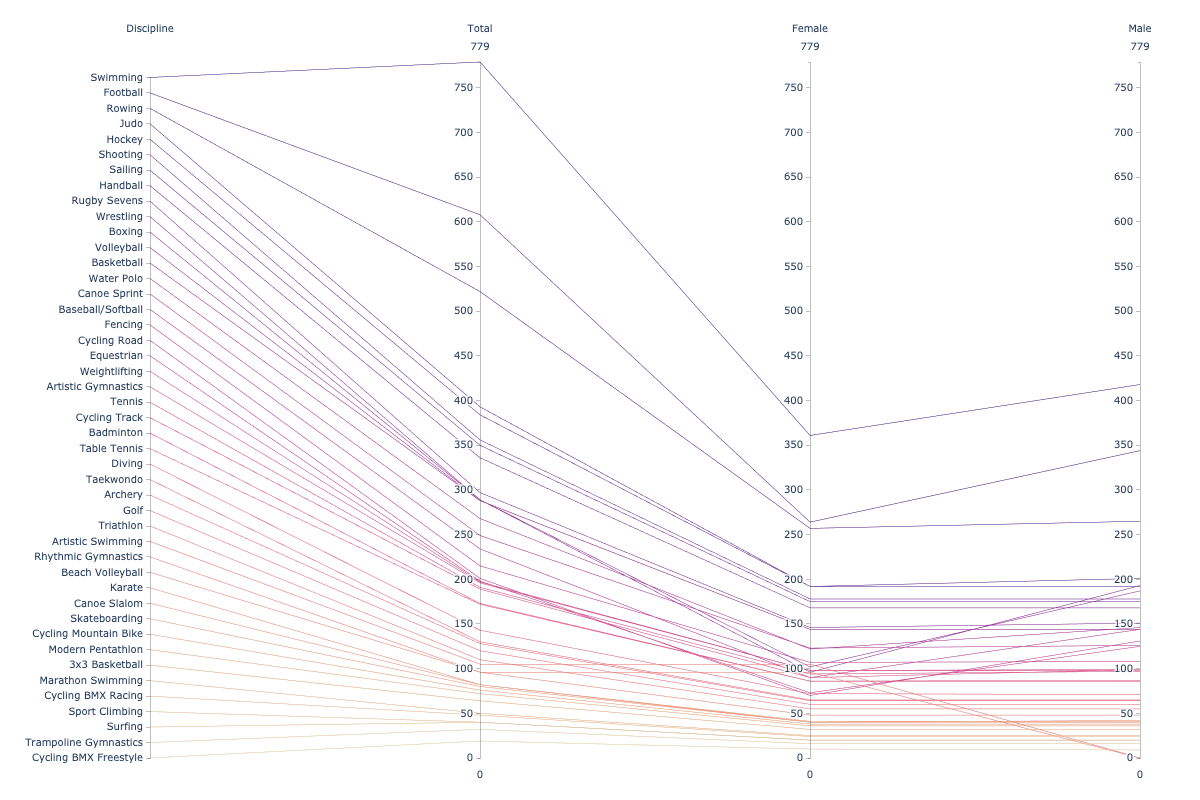

In [63]:
df_ = df_entries[df_entries['Discipline'] !='Athletics']
dimensions = list([ dict(range=(df_['Discipline Code'].max(), 1),
                       tickvals = df_['Discipline Code'], ticktext = df_['Discipline'],
                       label='Discipline', values=df_['Discipline Code']),
                    dict(range=(0,df_['Total'].max()), label='Total', values=df_['Total']),
                    dict(range=(0,df_['Total'].max()), label='Female', values=df_['Female']),
                    dict(range=(0,df_['Total'].max()), label='Male', values=df_['Male']),
                  ])
fig = go.Figure(data= go.Parcoords(line = dict(color = df_['Discipline Code'], colorscale = 'agsunset'),dimensions = dimensions))
fig.update_layout(width=1200, height=800,margin=dict(l=150, r=60, t=60, b=40))
fig.show("png") #fig.show()

Let's look at the entries where there is a difference

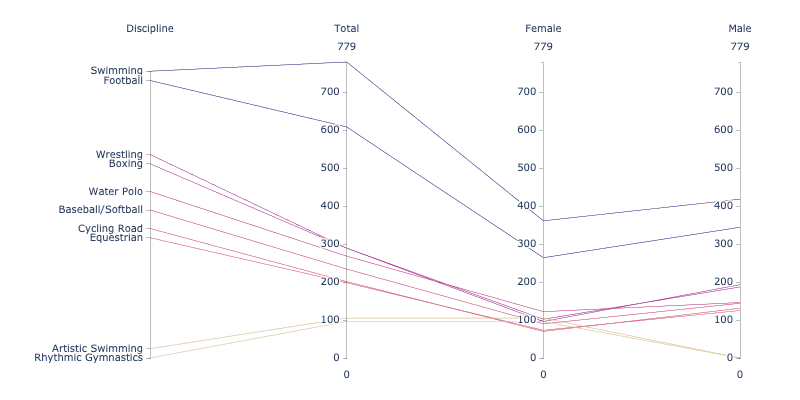

In [64]:
df_ = df_entries[abs(df_entries['Female'] - df_entries['Male'])>20]
df_ = df_[df_['Discipline'] !='Athletics']
df_.reset_index(inplace=True)

dimensions = list([ dict(range=(df_['Discipline Code'].max(), 1),
                       tickvals = df_['Discipline Code'], ticktext = df_['Discipline'],
                       label='Discipline', values=df_['Discipline Code']),
                    dict(range=(0,df_['Total'].max()), label='Total', values=df_['Total']),
                    dict(range=(0,df_['Total'].max()), label='Female', values=df_['Female']),
                    dict(range=(0,df_['Total'].max()), label='Male', values=df_['Male']),
                  ])
fig = go.Figure(data= go.Parcoords(line = dict(color = df_['Discipline Code'], colorscale = 'agsunset'), dimensions = dimensions))
fig.update_layout(width=800, height=400,margin=dict(l=150, r=60, t=60, b=40))
fig.show("png") #fig.show()